# **Analysis of Volcanoes and Earthquakes Over the Past 200 Years**

# Mitch Schneider

GEO 557 Solo Final Project



# **Abstract**

Volcanoes and earthquakes are both related to plate tectonics. Their geospatial relationship to one another along with individual analysis of both mechanisms over the past 200 years are discussed in this project. The earthquake data was brought in from the USGS (https://earthquake.usgs.gov/earthquakes/search/) focusing on ‘strong’ earthquakes, defined as those having a magnitude greater than 6. The Smithsonian Institution Global Volcanism Program (https://volcano.si.edu/list_volcano_holocene.cfm) was sourced for the volcano data. From 1820-2020 there have been 520 documented volcanic eruptions and 11,701 earthquakes (>6 M). Both categories increased in frequency since 1900 and even more so after 1950. 

When plotted spatially, earthquakes (>6 M) and volcanoes over the past 200 years do occur in similar locations near plate boundaries, and most notably near subduction zones. 78% of the volcanic eruptions occur in subduction zone tectonic settings. Stratovolcanoes were the most prevalent volcano type, totaling 60.2% over the last 200 years. Volcanic eruptions occurred between elevation ranges of -4,200 and +6,739 m, with a mean eruption elevation of 1,576 m realtve to sea level. Earthquake events were measured in reference to the earth’s surface and occurred at depths between ~0 km and 688 km within the crust and upper mantle. The median earthquake depth was 27.1 km with a mean of 62.1 km. Of the 11,701 earthquakes analyzed, 63.7% where 6.0-6.4 magnitude with decreasing prevalence as the magnitude increases. 


# **Introduction**

On Earth, volcanoes are most often found where tectonic plates are diverging or converging, including underwater (Wikipedia). These plate boundaries are where the different sections of the earth’s crust meet and interact with one another. Earthquakes also occur in volcanic regions, caused by both plate tectonics and the movement of magma in the subsurface. I set out in this project to investigate these events individually while also comparing their frequency and spatial distribution over the past 200 years. 

The raw volcano dataset contained 1,420 eruptions spanning the Holocence Epoch, and was trimmed down to focus on activity over the past 200 years with known location and eruption dates. The cleaned volcano dataset ready for analysis contained 520 volcanoes worldwide. The intitial earthquake dataset was constrained to magnitudes between 6.0-10 during export to allow a more manageable dataset. This resulted in an earthquake (>6 M) dataset of 11,701 events. 

In this project, I analyze the trends in both datasets. For earthquakes, location, depth and magnitude correlations. For volcanoes, location, tectonic setting, rock type and elevation correlations. Both volcano and earthquake (>6 M) occurence over time will be compared. I will also plot each dataset on a world map to see how they relate spatially. One volcano, Colima in Mexico, a stratovolcano in a subduction zone setting, will be zoomed in on to see how earthquakes (>6 M) plot near the indiviual eruption location. 


# **Data Wrangling**

***Importing:***


All python tools of various features needed to work with the datasets.

In [1]:
#!pip install geopandas
#!pip install earthpy
#!pip install plotly==4.10.0 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
import scipy
import scipy.stats as stats
from scipy.stats import gmean
import seaborn as sns
import geopandas as gpd
import earthpy as et
import folium
import plotly.express as px

 # from google.colab import drive 
    
import descartes
from shapely.geometry import Point, Polygon

#drive.mount('/content/gdrive')

**Volcano Dataset**

**Data Source:**

[Smithsonian Institution National Museum of Natural History Global Volcanism Program] 
(https://volcano.si.edu/list_volcano_holocene.cfm)

In [2]:
#import raw csv file from my google drive
#df=pd.read_csv('gdrive/My Drive/1_PythonCourse/Mines-ERDS/module_2/' + 'GVP_Volcano_List_Holocene_Import.csv', encoding='latin-1', skiprows=1)
#df

In [3]:
df = pd.read_csv('C:\_uploads\GVP_Volcano_List_Holocene_Import.csv', skiprows=1)
df.head(3)

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)


**Cleaning:**

In [4]:
# searches the whole DataFrame and replaces commas with nothing
df.replace(',','', regex=True, inplace=True) 

In [5]:
#reanaming columns to eliminate spaces
df.rename(columns= {'Volcano Number': 'Vol_Num', 'Volcano Name': 'Name', 'Primary Volcano Type': 'Type', 'Activity Evidence': 'Evidence', 'Last Known Eruption': 'Eruption_date', 'Elevation (m)': 'Elevation',
                    'Dominant Rock Type': 'Rock_type', 'Tectonic Setting': 'Tectonic_Sett' }, inplace = True)
df

,Vol_Num,Name,Country,Type,Evidence,Eruption_date,Region,Subregion,Latitude,Longitude,Elevation,Rock_type,Tectonic_Sett
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.850,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.970,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211003,Vulsini,Italy,Caldera,Eruption Observed,104 BCE,Mediterranean and Western Asia,Italy,42.600,11.930,800,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,390120,Leskov Island,United Kingdom,Stratovolcano,Unrest / Holocene,Unknown,Antarctica,Antarctica and South Sandwich Islands,-56.656,-28.140,190,Andesite / Basaltic Andesite,Subduction zone / Oceanic crust (< 15 km)
1416,390130,Zavodovski,United Kingdom,Stratovolcano,Eruption Observed,2016 CE,Antarctica,Antarctica and South Sandwich Islands,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction zone / Oceanic crust (< 15 km)
1417,390140,Protector Seamounts,United Kingdom,Submarine,Eruption Observed,1962 CE,Antarctica,Antarctica and South Sandwich Islands,-55.912,-28.167,-55,Rhyolite,Subduction zone / Oceanic crust (< 15 km)
1418,390829,James Ross Island,Antarctica,Shield,Evidence Credible,Unknown,Antarctica,Antarctica and South Sandwich Islands,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)


In [6]:
#removing 'Unknown Dates from Eruption Date column
df2 = df[df.Eruption_date != 'Unknown']

In [7]:
#removing BCE dates 
df3 = df2[~df2.Eruption_date.str.contains("BCE")]

In [8]:
#removing volcano number as it will not be useful 
del df3['Vol_Num']
df3

,Name,Country,Type,Evidence,Eruption_date,Region,Subregion,Latitude,Longitude,Elevation,Rock_type,Tectonic_Sett
6,Campi Flegrei,Italy,Caldera,Eruption Observed,1538 CE,Mediterranean and Western Asia,Italy,40.827,14.139,458,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)
7,Vesuvius,Italy,Stratovolcano,Eruption Observed,1944 CE,Mediterranean and Western Asia,Italy,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction zone / Continental crust (>25 km)
8,Ischia,Italy,Complex,Eruption Observed,1302 CE,Mediterranean and Western Asia,Italy,40.730,13.897,789,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km)
10,Stromboli,Italy,Stratovolcano,Eruption Observed,2020 CE,Mediterranean and Western Asia,Italy,38.789,15.213,924,Trachyandesite / Basaltic Trachyandesite,Subduction zone / Continental crust (>25 km)
12,Lipari,Italy,Stratovolcano(es),Eruption Dated,1230 CE,Mediterranean and Western Asia,Italy,38.490,14.933,590,Rhyolite,Subduction zone / Continental crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1411,Montagu Island,United Kingdom,Shield,Eruption Observed,2007 CE,Antarctica,Antarctica and South Sandwich Islands,-58.445,-26.374,1370,Basalt / Picro-Basalt,Subduction zone / Oceanic crust (< 15 km)
1412,Saunders,United Kingdom,Stratovolcano,Eruption Observed,2020 CE,Antarctica,Antarctica and South Sandwich Islands,-57.800,-26.483,843,Basalt / Picro-Basalt,Subduction zone / Oceanic crust (< 15 km)
1413,Candlemas Island,United Kingdom,Stratovolcano,Eruption Observed,1911 CE,Antarctica,Antarctica and South Sandwich Islands,-57.080,-26.670,550,Basalt / Picro-Basalt,Subduction zone / Oceanic crust (< 15 km)
1416,Zavodovski,United Kingdom,Stratovolcano,Eruption Observed,2016 CE,Antarctica,Antarctica and South Sandwich Islands,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction zone / Oceanic crust (< 15 km)


In [9]:
#removing remaining text from eruption data so it will read as a number
df3['Eruption_date'] = df3['Eruption_date'].str.replace('CE', '')

<ipython-input-9-83a529b65be8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Eruption_date'] = df3['Eruption_date'].str.replace('CE', '')


In [10]:
#Cleaning parentheis and symbos from volcano type column 
df3['Type'] = df3['Type'].str.replace('(es)', '')
df3['Type'] = df3['Type'].str.replace('(', '')
df3['Type'] = df3['Type'].str.replace(')', '')
df3['Type'] = df3['Type'].str.replace('?', '')

<ipython-input-10-8f5482984281>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['Type'] = df3['Type'].str.replace('(es)', '')
<ipython-input-10-8f5482984281>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Type'] = df3['Type'].str.replace('(es)', '')
<ipython-input-10-8f5482984281>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df3['Type'] = df3['Type'].str.replace('(', '')
<ipython-input-10-8f5482984281>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [11]:
#combining and renaming volcano types for better visualizaition
df3['Type'] = df3['Type'].str.replace('Pyroclastic cones', 'Pyroclastic cone')
df3['Type'] = df3['Type'].str.replace('Shields', 'Sheild')
df3['Type'] = df3['Type'].str.replace('Sheild', 'Shield')
df3['Type'] = df3['Type'].str.replace('Calderas', 'Caldera')
df3['Type'] = df3['Type'].str.replace('Fissure vents', 'Fissure vent')
df3['Type'] = df3['Type'].str.replace('Lava domes', 'Lava dome')
df3['Type'] = df3['Type'].str.replace('Maars', 'Maar')
df3['Type'] = df3['Type'].str.replace('Pyroclastic shield', 'Shield')
df3['Type'] = df3['Type'].str.replace('Cones', 'Volcanic Cone')
df3['Type'] = df3['Type'].str.replace('Lava cone', 'Volcanic Cone')
df3['Type'] = df3['Type'].str.replace('Tuff cones', 'Volcanic Cone')
df3['Type'] = df3['Type'].str.replace('Compound', 'Complex')
df3['Type'] = df3['Type'].str.replace('Crater rows', 'Fissure vent')
df3['Type'] = df3['Type'].str.replace('Explosion craters', 'Caldera')
df3['Type'] = df3['Type'].str.replace('Pyroclastic cone', 'Volcanic Cone')

<ipython-input-11-1a01aaf89f17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Type'] = df3['Type'].str.replace('Pyroclastic cones', 'Pyroclastic cone')
<ipython-input-11-1a01aaf89f17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Type'] = df3['Type'].str.replace('Shields', 'Sheild')
<ipython-input-11-1a01aaf89f17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [12]:
#checking volcano types after cleaning
print(df3.Type.value_counts())

Stratovolcano     397
Submarine          68
Caldera            55
Shield             55
Complex            38
Volcanic Cone      27
Lava dome          18
Volcanic field     18
Fissure vent       12
Maar                3
Subglacial          2
Name: Type, dtype: int64


In [13]:
#Cleaning parentheis and symbos from rock type column 
df3['Rock_type'] = df3['Rock_type'].fillna('Unknown')
df3['Rock_type'] = df3['Rock_type'].str.replace(')', '')
df3['Rock_type'] = df3['Rock_type'].str.replace('(', '')
df3['Rock_type'] = df3['Rock_type'].str.replace('No Data checked', 'Unknown')

<ipython-input-13-ee44037dc9a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rock_type'] = df3['Rock_type'].fillna('Unknown')
<ipython-input-13-ee44037dc9a8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df3['Rock_type'] = df3['Rock_type'].str.replace(')', '')
<ipython-input-13-ee44037dc9a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [14]:
#checking volcano types after cleaning
print(df3.Rock_type.value_counts())

Andesite / Basaltic Andesite                327
Basalt / Picro-Basalt                       202
Dacite                                       45
Trachybasalt / Tephrite Basanite             29
Rhyolite                                     26
Unknown                                      21
Trachyte / Trachydacite                      21
Trachyandesite / Basaltic Trachyandesite     14
Phonolite                                     4
Foidite                                       3
Phono-tephrite /  Tephri-phonolite            1
Name: Rock_type, dtype: int64


In [15]:
#Changing eruption date to an integer
df3['Eruption_date'] = df3['Eruption_date'].astype(int)

<ipython-input-15-58e495c62bdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Eruption_date'] = df3['Eruption_date'].astype(int)


In [16]:
#sorthing eruption date from oldest to newest
df4 = df3.sort_values(by=['Eruption_date'], ascending=True)

In [17]:
#eliminating eruption events older than 200 years
df5 = df4[df4['Eruption_date']  >= 1820]

In [18]:
df6 =df5.reset_index()

df6 is the final volcano cleaned dataframe ready for analysis

In [19]:
#deleting index column
del df6['index']
df6

,Name,Country,Type,Evidence,Eruption_date,Region,Subregion,Latitude,Longitude,Elevation,Rock_type,Tectonic_Sett
0,Kone,Ethiopia,Caldera,Eruption Observed,1820,Africa and Red Sea,Africa (northeastern) and Red Sea,8.788,39.701,1380,Rhyolite,Rift zone / Continental crust (>25 km)
1,Fentale,Ethiopia,Stratovolcano,Eruption Observed,1820,Africa and Red Sea,Africa (northeastern) and Red Sea,8.975,39.930,2007,Rhyolite,Rift zone / Continental crust (>25 km)
2,Fueguino,Chile,Lava dome,Eruption Observed,1820,South America,Southern Chile and Argentina,-54.970,-70.262,157,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
3,Kuttara,Japan,Stratovolcano,Eruption Dated,1820,Japan Taiwan Marianas,Hokkaido,42.491,141.160,549,Basalt / Picro-Basalt,Subduction zone / Continental crust (>25 km)
4,Cabal�an,Philippines,Stratovolcano,Eruption Dated,1820,Philippines and SE Asia,Central Philippines,10.285,125.218,912,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
515,Kadovar,Papua New Guinea,Stratovolcano,Evidence Credible,2020,Melanesia and Australia,Northeast of New Guinea,-3.608,144.588,365,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
516,Fournaise Piton de la,France,Shield,Eruption Observed,2020,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632,Basalt / Picro-Basalt,Intraplate / Oceanic crust (< 15 km)
517,Sangeang Api,Indonesia,Complex,Eruption Observed,2020,Indonesia,Lesser Sunda Islands,-8.200,119.070,1912,Trachybasalt / Tephrite Basanite,Subduction zone / Continental crust (>25 km)
518,Reventador,Ecuador,Stratovolcano,Eruption Observed,2020,South America,Ecuador,-0.077,-77.656,3562,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)


**Earthquake Dataset**

**Data Source:**

[USGS Earthquake Catalog] 
(https://earthquake.usgs.gov/earthquakes/search/)


In [20]:
#import raw csv file from my google drive
#eq =pd.read_csv('gdrive/My Drive/1_PythonCourse/Mines-ERDS/module_2/' + 'EarthquakeUSGS.csv')
#eq

In [21]:
eq = pd.read_csv('C:\_uploads\EarthquakeUSGS.csv')
eq.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-12-06T16:47:42.152Z,-20.3689,-69.0887,99.86,6.1,mww,NaN,31.0,0.703,1.13,...,2020-12-08T17:00:53.711Z,"112 km E of Iquique, Chile",earthquake,5.4,3.7,0.042,54.0,reviewed,us,us
1,2020-12-01T20:52:57.053Z,-61.9613,154.7338,10.00,6.0,mww,NaN,30.0,7.807,0.87,...,2020-12-02T21:46:18.711Z,Balleny Islands region,earthquake,10.3,1.8,0.083,14.0,reviewed,us,us
2,2020-12-01T16:22:39.884Z,52.7655,-168.2667,23.00,6.4,mww,NaN,61.0,0.633,0.82,...,2020-12-09T16:32:54.183Z,"44 km ESE of Nikolski, Alaska",earthquake,4.6,1.6,0.025,150.0,reviewed,us,us


In [22]:
#removing min/sec/hour from earthquake time
#resulting in just earthquake year to match the time format for volcano dataframe
eqtemp = eq['time'].values
eqtemp = eq['time'].str[:4]
eq['time'] = eqtemp
eq.time.unique()

array(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997',
       '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981',
       '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973',
       '1972', '1971', '1970', '1969', '1968', '1967', '1966', '1965',
       '1964', '1963', '1962', '1961', '1960', '1959', '1958', '1957',
       '1956', '1955', '1954', '1953', '1952', '1951', '1950', '1949',
       '1948', '1947', '1946', '1945', '1944', '1943', '1942', '1941',
       '1940', '1939', '1938', '1937', '1936', '1935', '1934', '1933',
       '1932', '1931', '1930', '1929', '1928', '1927', '1926', '1925',
       '1924', '1923', '1922', '1921', '1920', '1919', '1918', '1917',
       '1916', '1915', '1914', '1913', '1912', '1911', '1910', '1909',
      

In [23]:
#sorting dataframe from oldest to newest event
eq2 = eq.sort_values(by=['time'], ascending=True)

In [24]:
eq3 = eq2.reset_index()

In [25]:
#dropping unnecessary columns
eq4 = eq3.drop(columns=['index', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated'])
eq4 

,time,latitude,longitude,depth,mag,magType,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1823,19.2500,-155.0000,NaN,7.0,mfa,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
1,1836,37.8000,-122.2000,NaN,6.8,ml,"San Francisco Bay area, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg
2,1838,19.2500,-155.0000,NaN,6.1,mint,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
3,1840,19.2500,-155.0000,NaN,6.1,mint,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
4,1841,19.2500,-155.0000,NaN,6.5,mfa,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,2020,-36.9558,77.3930,10.00,6.1,mww,"97km N of Amsterdam Island, France",earthquake,7.4,1.7,0.045,48.0,reviewed,us,us
11697,2020,1.3950,126.4381,42.00,6.0,mww,"123km WNW of Kota Ternate, Indonesia",earthquake,6.6,1.9,0.060,27.0,reviewed,us,us
11698,2020,44.4646,-115.1175,12.06,6.5,mww,"70km W of Challis, Idaho",earthquake,8.5,3.8,0.021,212.0,reviewed,us,us
11699,2020,48.9638,157.6955,57.80,7.5,mww,"221km SSE of Severo-Kuril'sk, Russia",earthquake,5.6,2.7,0.020,239.0,reviewed,us,us


In [26]:
#renaming time to quake time to make it easier to not get the dataframes confused
eq4.rename(columns= {'time': 'Quake_date'}, inplace = True)

In [27]:
#chaning quake date dtype to an integer
eq4['Quake_date'] = eq4['Quake_date'].astype(int)
print(eq4.dtypes)

Quake_date           int32
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object


eq4 is the final earthquake cleaned dataframe ready for analysis

In [28]:
eq4

,Quake_date,latitude,longitude,depth,mag,magType,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1823,19.2500,-155.0000,NaN,7.0,mfa,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
1,1836,37.8000,-122.2000,NaN,6.8,ml,"San Francisco Bay area, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg
2,1838,19.2500,-155.0000,NaN,6.1,mint,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
3,1840,19.2500,-155.0000,NaN,6.1,mint,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
4,1841,19.2500,-155.0000,NaN,6.5,mfa,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,2020,-36.9558,77.3930,10.00,6.1,mww,"97km N of Amsterdam Island, France",earthquake,7.4,1.7,0.045,48.0,reviewed,us,us
11697,2020,1.3950,126.4381,42.00,6.0,mww,"123km WNW of Kota Ternate, Indonesia",earthquake,6.6,1.9,0.060,27.0,reviewed,us,us
11698,2020,44.4646,-115.1175,12.06,6.5,mww,"70km W of Challis, Idaho",earthquake,8.5,3.8,0.021,212.0,reviewed,us,us
11699,2020,48.9638,157.6955,57.80,7.5,mww,"221km SSE of Severo-Kuril'sk, Russia",earthquake,5.6,2.7,0.020,239.0,reviewed,us,us


# **Visualization**

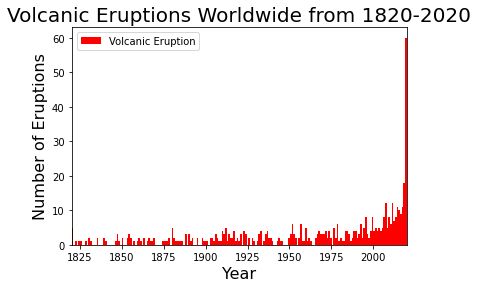

In [29]:
plt.hist(df6.Eruption_date.values, bins = 201, color='r', alpha = 1, label='Volcanic Eruption')
plt.xlim(1820,2020)
plt.xlabel('Year', size=16)
plt.ylabel('Number of Eruptions', size=16)
plt.title('Volcanic Eruptions Worldwide from 1820-2020', size=20)
plt.legend(loc='upper left');

***Figure 1***. Plotting volcanic events by year was a great way to see the distribution over time. There seems to be a slight increase in eruptions after 1900, and an almost linear increase of events since the year 2000. With the Most volcanoes ever recorded in 1 year (60) in 2020. 

The number of eruptions in 2020 is in large part due to ongoing eruptions counting for the current year in which data is taken, while also adding in the 22 new eruptions that erupted for the first time in 2020 (Smithsonian)

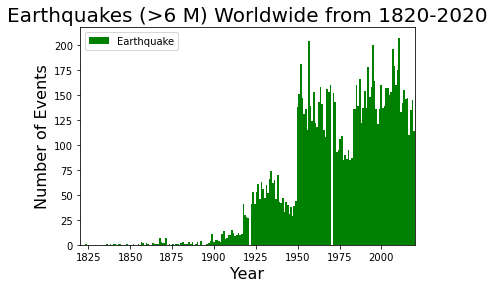

In [30]:
plt.hist(eq4.Quake_date.values, bins = 201, color='g', alpha = 1, label='Earthquake')
plt.xlim(1820,2020)
plt.xlabel('Year', size=16)
plt.ylabel('Number of Events', size=16)
plt.title('Earthquakes (>6 M) Worldwide from 1820-2020', size=20)
plt.legend();

***Figure 2***. Earthquake events also show an overall increase through time. This has to be in part due to the increased ability for mankind to recognize these events, not only their natural occurrence. After 1950 there is a large increase in events where earthquakes between 6-10 range between ~100-200 per year. 

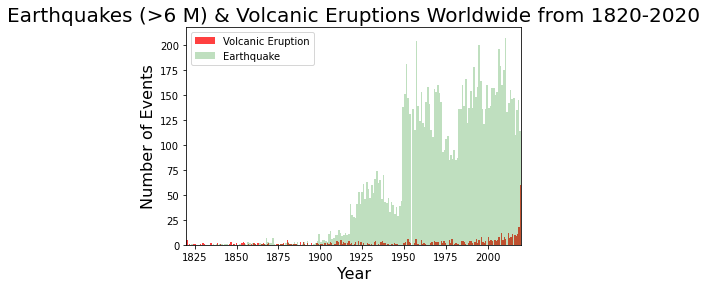

In [31]:
pyplot.hist(df6.Eruption_date.values, bins = 250, color='r', alpha = 0.75, label= 'Volcanic Eruption')
pyplot.hist(eq4.Quake_date.values, bins = 200, color='g', alpha = 0.25, label= 'Earthquake')
plt.xlim(1820,2020)
plt.xlabel('Year', size=16)
plt.ylabel('Number of Events', size=16)
plt.title('Earthquakes (>6 M) & Volcanic Eruptions Worldwide from 1820-2020', size=20);
pyplot.legend(loc='upper left')
pyplot.show()

***Figure 3.*** The comparison of the histograms shows the large difference in overall number of events that happen between the 2 categories. With earthquakes highly outnumbering the volcanic events each year. 

In [32]:
#imporing world plt from geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

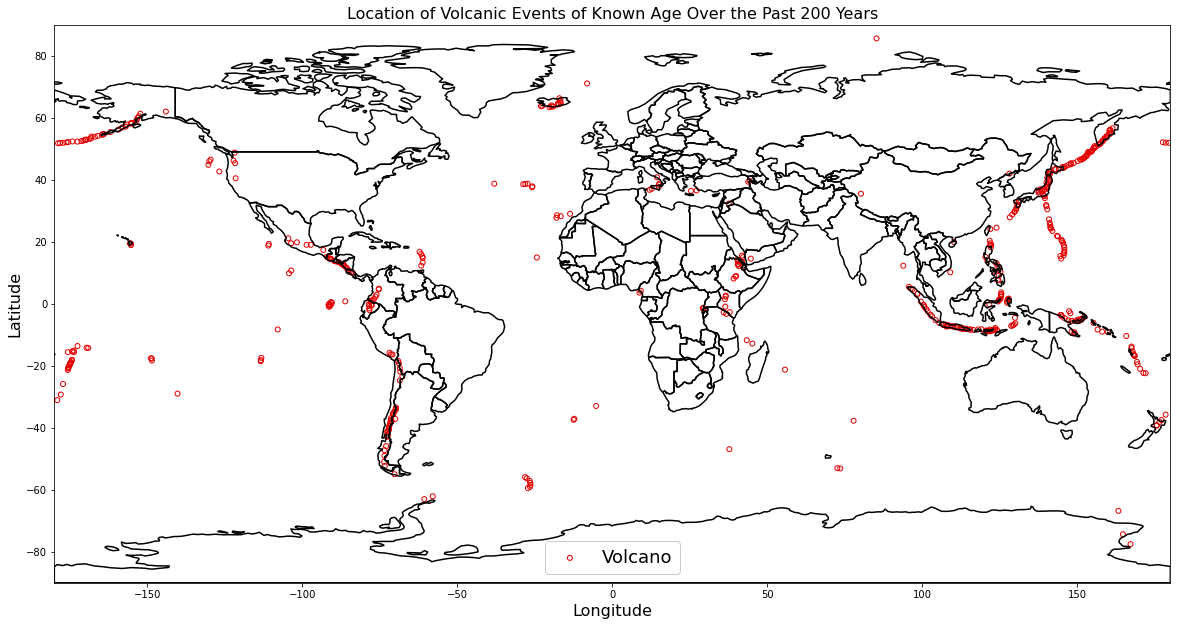

In [33]:
fig, ax = plt.subplots(figsize=[20,20])

world.boundary.plot(ax=ax,color='k')

ax.scatter(df6.Longitude, df6.Latitude, s=25, facecolors='none', edgecolors='xkcd:red', label='Volcano')

plt.title('Location of Volcanic Events of Known Age Over the Past 200 Years', size=16)

ax.set_xlabel("Longitude", size=16)

ax.set_ylabel("Latitude", size=16)

ax.set_xlim([-180,180])
ax.set_ylim([-90,90])
ax.set_aspect('equal')

ax.legend(loc=8, prop={'size': 18}, framealpha=1);

***Figure 4.*** Volcanic eruption distribution plotted on the world map.

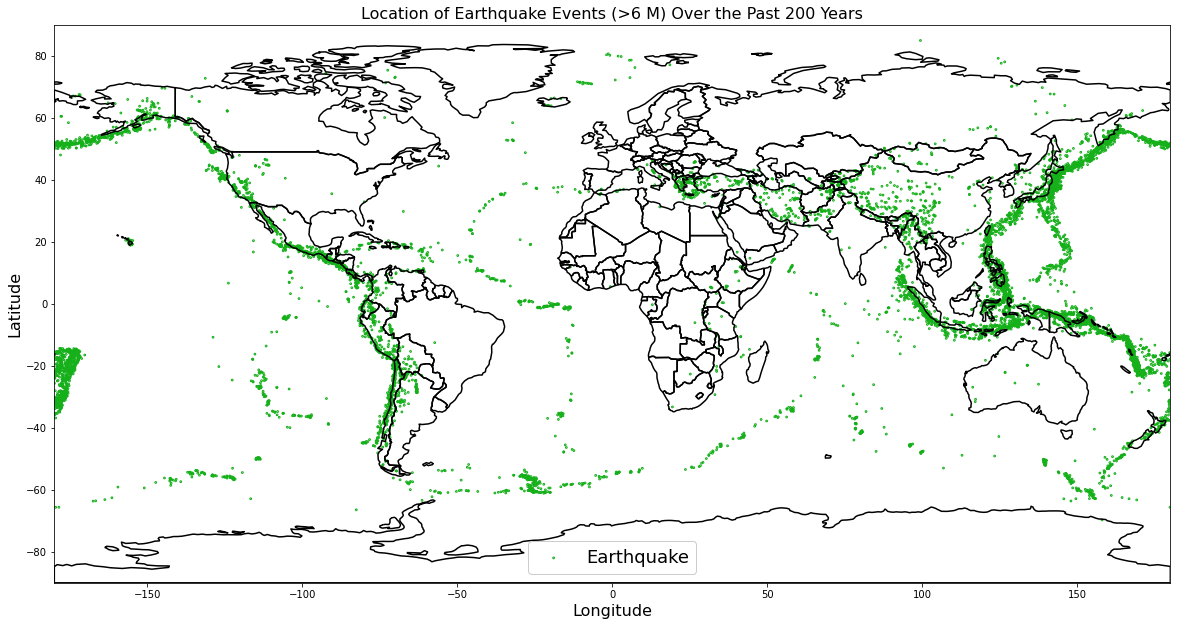

In [34]:
fig, ax = plt.subplots(figsize=[20,20])

world.boundary.plot(ax=ax,color='k')

ax.scatter(eq4.longitude, eq4.latitude, s=3, facecolors='none', edgecolors='xkcd:green', label='Earthquake')

plt.title('Location of Earthquake Events (>6 M) Over the Past 200 Years', size=16)

ax.set_xlabel("Longitude", size=16)

ax.set_ylabel("Latitude", size=16)

ax.set_xlim([-180,180])
ax.set_ylim([-90,90])
ax.set_aspect('equal')

ax.legend(loc=8, prop={'size': 18}, framealpha=1);

***Figure 5.*** Earthquake (>6 M) distribution plotted on the world map.

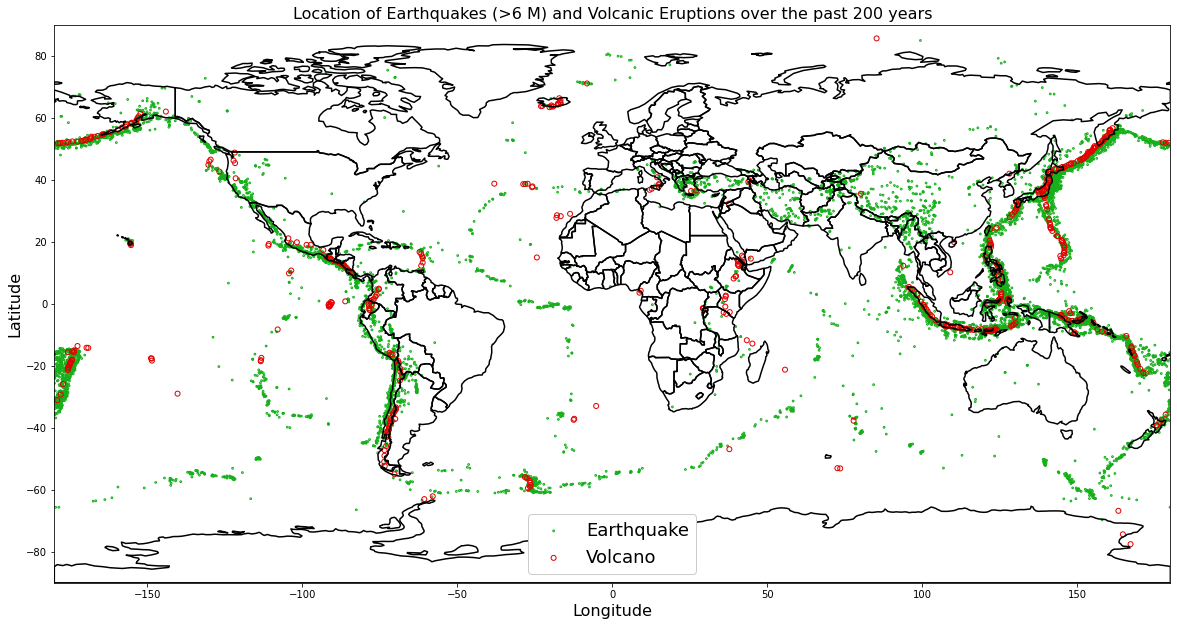

In [35]:
fig, ax = plt.subplots(figsize=[20,20])

world.boundary.plot(ax=ax,color='k')

ax.scatter(eq4.longitude, eq4.latitude, s=3, facecolors='none', edgecolors='xkcd:green', label='Earthquake')
ax.scatter(df6.Longitude, df6.Latitude, s=25, facecolors='none', edgecolors='xkcd:red', label='Volcano')

plt.title('Location of Earthquakes (>6 M) and Volcanic Eruptions over the past 200 years', size=16)

ax.set_xlabel("Longitude", size=16)

ax.set_ylabel("Latitude", size=16)

ax.set_xlim([-180,180])
ax.set_ylim([-90,90])
ax.set_aspect('equal');

ax.legend(loc=8, prop={'size': 18}, framealpha=1);

***Figure 6.*** When plotted spatially, earthquakes and volcanoes do occur in similar locations most notably on plate boundaries. These are where the different sections of the earth’s crust meet and interact with one another. 

Here the data is subset to analyze the distribution of the Colima volcano in Mexico and the surrounding earthqake events.

In [36]:
#rounding decimals and creating new dataframe 
df7 = np.round(df6, decimals=5)
df7.tail(2)

,Name,Country,Type,Evidence,Eruption_date,Region,Subregion,Latitude,Longitude,Elevation,Rock_type,Tectonic_Sett
518,Reventador,Ecuador,Stratovolcano,Eruption Observed,2020,South America,Ecuador,-0.077,-77.656,3562,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
519,Telica,Nicaragua,Stratovolcano,Eruption Observed,2020,M�xico and Central America,Nicaragua,12.606,-86.840,1036,Basalt / Picro-Basalt,Subduction zone / Continental crust (>25 km)


In [37]:
#rounding decimals and creating new dataframe 
eq5 = np.round(eq4, decimals=5)
eq5.tail(2)

,Quake_date,latitude,longitude,depth,mag,magType,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
11699,2020,48.9638,157.6955,57.80,7.5,mww,"221km SSE of Severo-Kuril'sk, Russia",earthquake,5.6,2.7,0.020,239.0,reviewed,us,us
11700,2020,-20.3689,-69.0887,99.86,6.1,mww,"112 km E of Iquique, Chile",earthquake,5.4,3.7,0.042,54.0,reviewed,us,us


In [38]:
#renaming earthquake lat and long columns to match volcano columns exactly 
eq5.rename(columns= {'latitude': 'Latitude', 'longitude': 'Longitude' }, inplace = True)
eq5.head(2)

,Quake_date,Latitude,Longitude,depth,mag,magType,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1823,19.25,-155.0,NaN,7.0,mfa,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
1,1836,37.80,-122.2,NaN,6.8,ml,"San Francisco Bay area, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg


In [39]:
#find lat and long info for colima volcano
matchdf = df7.loc[df7['Name'] == 'Colima']
matchdf

,Name,Country,Type,Evidence,Eruption_date,Region,Subregion,Latitude,Longitude,Elevation,Rock_type,Tectonic_Sett
456,Colima,Mexico,Stratovolcano,Eruption Observed,2019,M�xico and Central America,Mexico,19.514,-103.62,3850,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)


In [40]:
#use lat and long from colima volcano then set limits of ~1.5 degres latitude on either side of it to make a new dataframe. 
ematch = eq5[(eq5['Latitude'] > 18) & (eq5['Latitude'] < 21)]
ematch

,Quake_date,Latitude,Longitude,depth,mag,magType,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1823,19.2500,-155.0000,NaN,7.0,mfa,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
2,1838,19.2500,-155.0000,NaN,6.1,mint,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
3,1840,19.2500,-155.0000,NaN,6.1,mint,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
4,1841,19.2500,-155.0000,NaN,6.5,mfa,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
6,1844,19.2500,-155.0000,NaN,6.1,mint,"Hawaii region, Hawaii",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,official
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,2019,19.4533,101.3558,10.00,6.2,mww,"32km ESE of Chaloem Phra Kiat, Thailand",earthquake,6.4,1.7,0.049,40.0,reviewed,us,us
11547,2019,19.0200,145.7965,144.32,6.0,mww,"31km NNE of Agrihan, Northern Mariana Islands",earthquake,4.8,4.2,0.046,46.0,reviewed,us,us
11656,2020,18.9457,-80.7411,10.00,6.1,mww,"55km SE of East End, Cayman Islands",earthquake,8.2,1.8,0.098,10.0,reviewed,us,us
11657,2020,19.4193,-78.7560,14.86,7.7,mww,"123km NNW of Lucea, Jamaica",earthquake,6.0,2.9,0.022,199.0,reviewed,us,us


In [41]:
#then further refine that dataframe with longitude constraints ~1.5 degrees above and below
ematch2 = ematch[(ematch['Longitude'] > -105 ) & (ematch['Longitude'] < -102)]
ematch2.tail(10)

,Quake_date,Latitude,Longitude,depth,mag,magType,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
6491,1986,18.404,-102.973,26.5,7.0,mw,"Michoacan, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,nc
7824,1995,19.055,-104.205,33.0,8.0,mw,"Colima, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
7825,1995,18.810,-104.017,16.1,6.0,mw,"offshore Colima, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
8209,1997,18.219,-102.756,33.0,7.2,mwb,"Michoacan, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
8528,2000,18.198,-102.480,45.8,6.5,mwc,"Michoacan, Mexico",earthquake,NaN,2.2,NaN,NaN,reviewed,us,hrv
8769,2001,18.816,-104.446,33.0,6.3,mwc,"offshore Colima, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
8786,2001,18.736,-104.545,10.0,6.2,mwc,"offshore Colima, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
9048,2003,18.770,-104.104,24.0,7.6,mwb,"offshore Colima, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
10596,2012,18.229,-102.689,20.0,6.5,mwb,"Michoacan, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
10744,2013,18.081,-102.182,30.0,6.0,mww,"20km NNW of La Union, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us


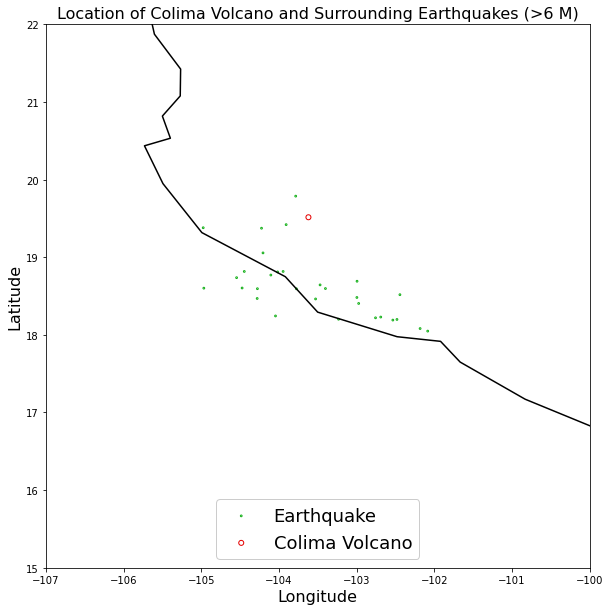

In [42]:
fig, ax = plt.subplots(figsize=[10,10])

world.boundary.plot(ax=ax,color='k')

ax.scatter(ematch2.Longitude, ematch2.Latitude, s=3, facecolors='none', edgecolors='xkcd:green', label='Earthquake')
ax.scatter(matchdf.Longitude, matchdf.Latitude, s=25, facecolors='none', edgecolors='xkcd:red', label='Colima Volcano')

plt.title('Location of Colima Volcano and Surrounding Earthquakes (>6 M)', size=16)

ax.set_xlabel("Longitude", size=16)

ax.set_ylabel("Latitude", size=16)

ax.set_xlim([-107,-100])
ax.set_ylim([15,22])
ax.set_aspect('equal');

ax.legend(loc=8, prop={'size': 18}, framealpha=1);

***Figure 7.*** Shows the location of the Colima Volcano along the Mexican coast and the earthquake activity within 3 degrees latitude and longitude of it. This would indicate that earthquakes (>6 M) magnitude occur around but not in the exact locations of all volcanic eruptions. 

Now visualizing rations of the entire dataset.

In [43]:
#subsetting data to see ratio of earthquake magnitude across entire dataset
e = eq4.mag
ecounts = e.value_counts()
epercent = e.value_counts(normalize=True)
epercent100 = e.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': ecounts, 'ratio': epercent, 'percent': epercent100})

,counts,ratio,percent
6.00,2215,0.189300,18.9%
6.10,1674,0.143065,14.3%
6.20,1348,0.115204,11.5%
6.30,1281,0.109478,10.9%
6.40,944,0.080677,8.1%
...,...,...,...
6.82,1,0.000085,0.0%
9.20,1,0.000085,0.0%
6.23,1,0.000085,0.0%
7.65,1,0.000085,0.0%


***Figure 8.*** Of the 11,701 earthquakes 63.7% or 7,453 of them where 6.0-6.4 magnitude with generally decreasing prevalence as the magnitude increases.    

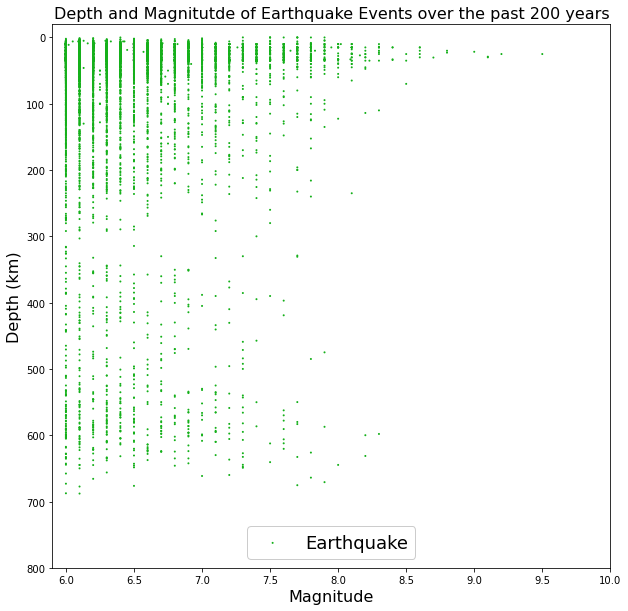

In [44]:
fig, ax = plt.subplots(figsize=[10,10])

ax.scatter(eq4.mag, eq4.depth, s=1, facecolors='none', edgecolors='xkcd:green', label='Earthquake')

plt.title('Depth and Magnitutde of Earthquake Events over the past 200 years', size=16)

ax.set_xlabel("Magnitude", size=16)

ax.set_ylabel("Depth (km)", size=16)

ax.set_xlim([5.9,10])
ax.set_ylim([-20,800])
plt.gca().invert_yaxis()

ax.legend(loc=8, prop={'size': 18}, framealpha=1);

***Figure 9.*** Earthquakes occur in the earths crust and upper mantle which range from ~0-800 km deep (USGS). This statistic agrees with the data plotted above over the past 200 years.

In [45]:
#subsetting data to see ratio of volcano type across entire dataset
s= df6.Type
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'ratio': percent, 'percent': percent100})

,counts,ratio,percent
Stratovolcano,313,0.601923,60.2%
Submarine,65,0.125000,12.5%
Shield,41,0.078846,7.9%
Caldera,36,0.069231,6.9%
Complex,34,0.065385,6.5%
Volcanic Cone,12,0.023077,2.3%
Lava dome,8,0.015385,1.5%
Fissure vent,6,0.011538,1.2%
Volcanic field,3,0.005769,0.6%
Subglacial,1,0.001923,0.2%


***Figure 10.*** Of the 11 volcano types, stratovolcanoes dominante the distribution at 60.2% of the eruptions of the past 200 years. 

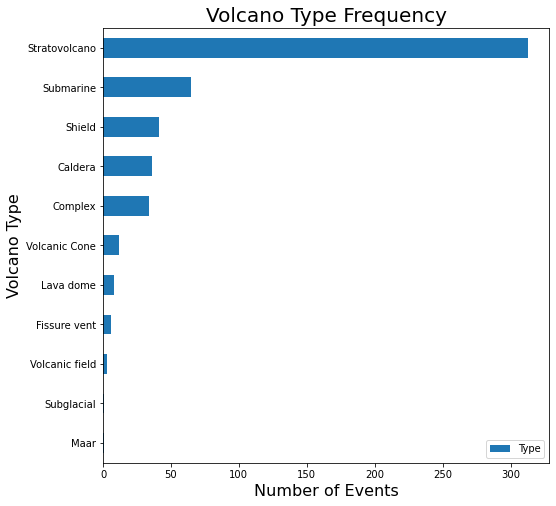

In [46]:
df6['Type'].value_counts().plot(kind='barh', figsize=[8,8])  
plt.gca().invert_yaxis()
plt.xlabel('Number of Events', size=16)
plt.ylabel('Volcano Type', size=16)
plt.title('Volcano Type Frequency', size=20);
pyplot.legend(loc='lower right')
pyplot.show()
plt.show()

***Figure 11.*** Bar chart showing distribution of volcano types

The earths crust is the outermost layer of the earth. It is most commonly described as continental or oceanic crust. Continental crust is typically >25km thick, is older and lighter. Whereas oceanic crust is thinner <15km thick, is denser, and is constantly being destroyed and replaced at plate boundaries. (BBC)

The tectonic settings are broken into 10 potential categories determined by the crustal thickness, and the type of crustal boundary its associated with. These are, subduction zone/continental crust, subduction zone/oceanic crust, subduction zone/intermediate crust, subduction zone/unknown crustal thickness, rift zone/oceanic crust, rift zone/continental crust, rift zone/intermediate crust, intraplate/oceanic crust, intraplate/continental crust, and intraplate/intermediate crust. 

A subduction zone is the place where two lithospheric plates come together, and one plate sinks into the mantle underneath the other plate. Most volcanoes on land occur parallel to and inland from the boundary between the two plates. (USGS)

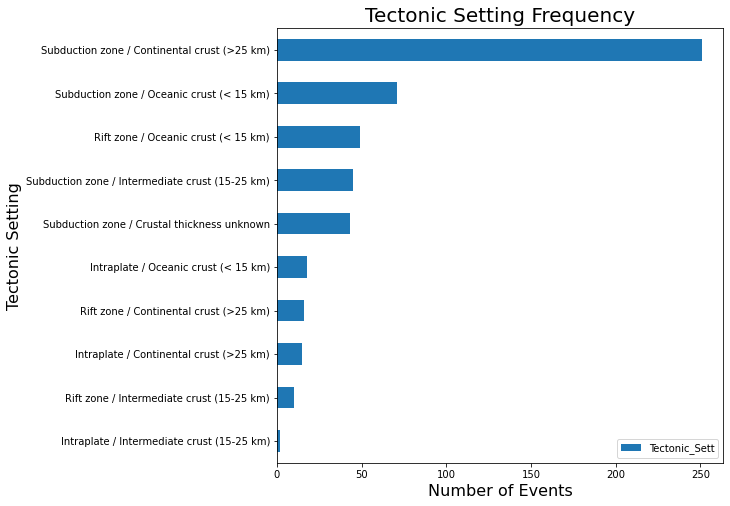

In [47]:
df6['Tectonic_Sett'].value_counts().plot(kind='barh', figsize=[8,8])   
plt.gca().invert_yaxis()
plt.xlabel('Number of Events', size=16)
plt.ylabel('Tectonic Setting', size=16)
plt.title('Tectonic Setting Frequency', size=20);
pyplot.legend(loc='lower right')
pyplot.show()
plt.show()

***Figure 12.*** Bar chart representation of the tectonic settings where volcanic eruptions occur. Subduction zone of continental crust setting accounts for almost 50% of the volcanic eruptions over the past 200 years. Overall, subduction zone tectonic settings of all kinds acount for 78% of volcanic activity.

Volcanic rock is formed from the lava erupted from the volcano and is named according to both its chemical composition and texture (Wikipedia)

Andesite is an extrusive volcanic rock and is the intermediate type between basalt and rhyolite. It has a fine-grained texture, and is composed predominantly of sodium rich plagioclase plus pyroxene or hornblende. Andesite is the dominant rock type associated with subduction zones and makes sense that it is the the largest of this dataset (Wikipedia). 

Overall the average composition of the earth crust is adesitic, it is also a major component of martian crust (Wikipedia).

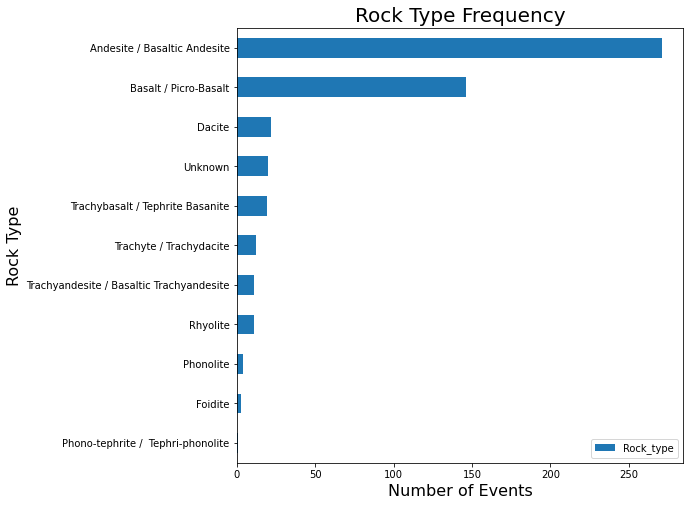

In [48]:
df6['Rock_type'].value_counts().plot(kind='barh', figsize=[8,8])  
plt.gca().invert_yaxis()
plt.xlabel('Number of Events', size=16)
plt.ylabel('Rock Type', size=16)
plt.title('Rock Type Frequency', size=20);
pyplot.legend(loc='lower right')
pyplot.show()
plt.show()
plt.show()

***Figure 13.*** Andesite and Basalt plotting as the dominat rock types produced from volcanoes over the past 200 years.

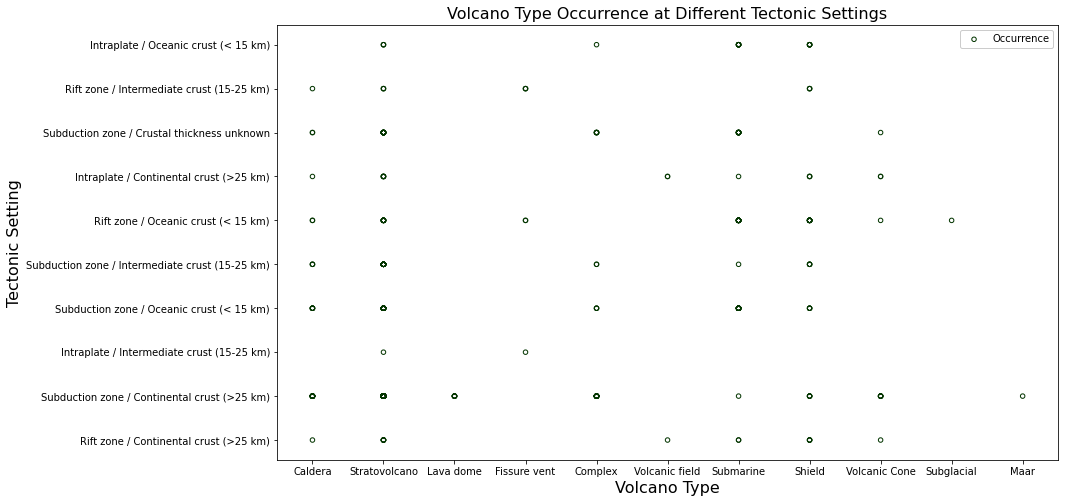

In [49]:
fig, ax = plt.subplots(figsize=[14,8])

ax.scatter(df6.Type, df6.Tectonic_Sett, s=20, facecolors='none', edgecolors='xkcd:dark green', label='Occurrence')

plt.title('Volcano Type Occurrence at Different Tectonic Settings', size=16)

ax.set_xlabel("Volcano Type", size=16)

ax.set_ylabel("Tectonic Setting", size=16)

ax.legend(loc=1, prop={'size': 10}, framealpha=1);

***Figure 14.*** Scatter plot shows the occurrence of the different volcano types in different tectonic settings. Stratovolcanoes, the dominant type can be found in all settings. 

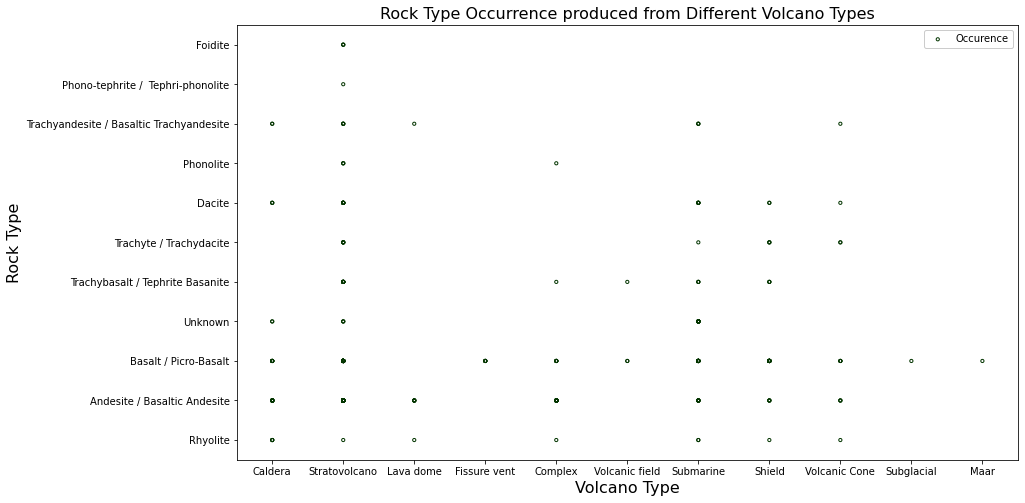

In [50]:
df6['Rock_type'] = df6['Rock_type'].astype(str)

fig, ax = plt.subplots(figsize=[14,8])

ax.scatter(df6.Type, df6.Rock_type, s=10, facecolors='none', edgecolors='xkcd:dark green', label='Occurence')

plt.title('Rock Type Occurrence produced from Different Volcano Types', size=16)

ax.set_xlabel("Volcano Type", size=16)

ax.set_ylabel("Rock Type", size=16)

ax.legend(loc=1, prop={'size': 10}, framealpha=1);

***Figure 15.*** Scatter plot shows the occurrence of the different rock types produced from different volcano types. Stratovolcanoes, are capable of producing all rock types, whereas fissure vents and maars can only produce basalt.  

# **Statistical Analysis**

In [51]:
print((len(df6.index)/200), 'volcanoes per year')

2.6 volcanoes per year


Overall average number of volcanic eruptions per year over the past 200 years.

In [52]:
print((len(eq4.index)/200), 'strong earthquakes per year')

58.505 strong earthquakes per year


Overall average number earthquakes (>6 M) per year over the past 200 years.

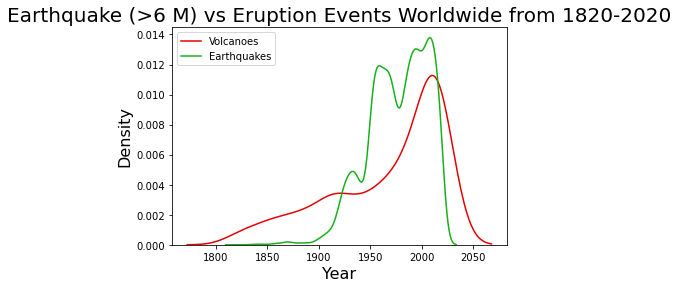

In [53]:
sns.kdeplot(df6.Eruption_date, color='xkcd:red', label='Volcanoes')
sns.kdeplot(eq4.Quake_date, color='xkcd:green', label ='Earthquakes');
plt.xlabel('Year', size=16)
plt.ylabel('Density', size=16)
plt.title('Earthquake (>6 M) vs Eruption Events Worldwide from 1820-2020', size=20);
pyplot.legend(loc='upper left')
pyplot.show()

***Figure 16.*** KDE plot showing the relaive densities of observed earthquake (>6 M) and volcanic events over the past 200 years. 

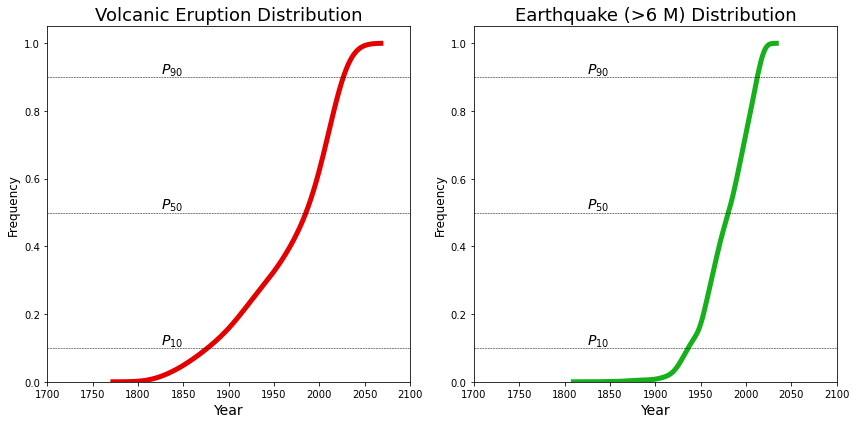

In [54]:
fig, [ax, ax2] = plt.subplots(1,2, figsize=[12,6])

# volcano data
sns.kdeplot(df6.Eruption_date, ax=ax, cumulative=True, color="xkcd:red", shade=False, linewidth=5, label='Volcano')

ax.set_xlabel('Year',fontsize=14)
ax.set_xlim(1700, 2100)
ax.set_ylabel('Frequency',fontsize=12)
ax.set_title('Volcanic Eruption Distribution',fontsize=18)

ax.axhline(y=0.1, color='k', linestyle='--', linewidth=0.5)
ax.text(1825,0.11,r'$ P_{10}$',fontsize=14)

ax.axhline(y=0.5, color='k', linestyle='--', linewidth=0.5)
ax.text(1825,0.51,r'$ P_{50}$',fontsize=14)

ax.axhline(y=0.9, color='k', linestyle='--', linewidth=0.5)
ax.text(1825,0.91,r'$ P_{90}$',fontsize=14)

# Earthquake data
sns.kdeplot(eq4.Quake_date, ax=ax2, cumulative=True, color="xkcd:green", shade=False, linewidth=5, label='Earthquake')

ax2.set_xlabel('Year',fontsize=14)
ax2.set_xlim(1700, 2100)
ax2.set_ylabel('Frequency',fontsize=12)
ax2.set_title('Earthquake (>6 M) Distribution',fontsize=18)

ax2.axhline(y=0.1, color='k', linestyle='--', linewidth=0.5)
ax2.text(1825,0.11,r'$ P_{10}$',fontsize=14)

ax2.axhline(y=0.5, color='k', linestyle='--', linewidth=0.5)
ax2.text(1825,0.51,r'$ P_{50}$',fontsize=14)

ax2.axhline(y=0.9, color='k', linestyle='--', linewidth=0.5)
ax2.text(1825,0.91,r'$ P_{90}$',fontsize=14)

plt.tight_layout()
plt.show()

***Figure 17.*** A cumulative distribution function (CDF) plot shows the frequency of the 2 datasets over the studied time interval. 

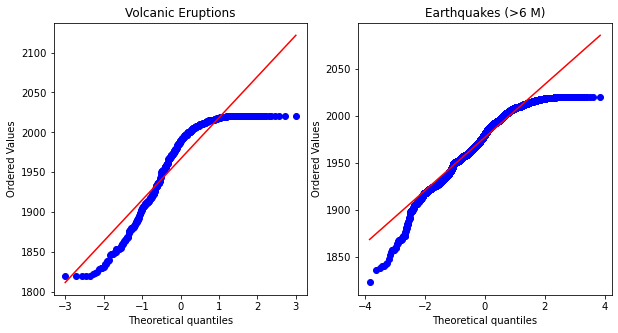

In [55]:
fig, ax = plt.subplots(1,2, figsize=[10,5])
stats.probplot(df6.Eruption_date, plot=ax[0], dist='norm')
ax[0].set_title('Volcanic Eruptions')
stats.probplot(eq4.Quake_date, plot=ax[1], dist='norm')
ax[1].set_title('Earthquakes (>6 M)');

***Figure 18.*** Q-Q plots for both datasets showing that neither is normally distributed over time. 

C:\mschneider\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


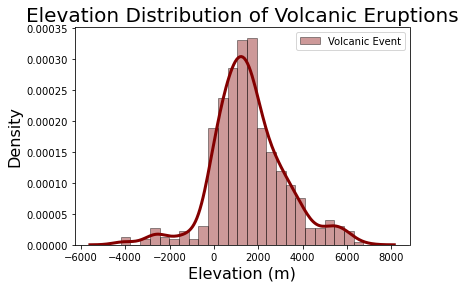

In [56]:
sns.distplot(df6.Elevation, hist=True, color='xkcd:dark red', hist_kws=dict(edgecolor="black"), kde_kws=dict(linewidth=3), label='Volcanic Event')
plt.xlabel('Elevation (m)', size=16)
plt.ylabel('Density', size=16)
plt.title('Elevation Distribution of Volcanic Eruptions', size=20);
pyplot.legend(loc='upper right')
pyplot.show()
plt.show();

***Figure 19.*** Distplot below showing the distribution of elevations where volcanic events take place. 

Below are elevation statistics of volcanic eruptions in terms of meters relative to sealevel.



Median

In [57]:
print(df6.Elevation.median(),'meters')

1409.5 meters


Mean

In [58]:
print(round(df6.Elevation.mean(),1),'meters')

1576.4 meters


Minimum

In [59]:
print(df6.Elevation.min(),'meters')

-4200 meters


Maximum

In [60]:
print(df6.Elevation.max(), 'meters')

6739 meters


C:\mschneider\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


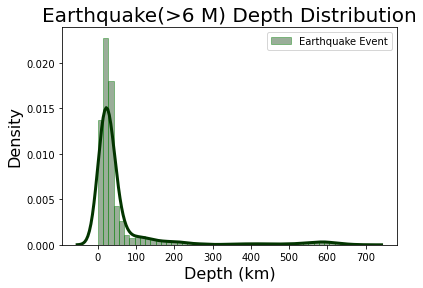

In [61]:
sns.distplot(eq4.depth, hist=True, color='xkcd:dark green', hist_kws=dict(edgecolor="green"), kde_kws=dict(linewidth=3), label = 'Earthquake Event')
plt.xlabel('Depth (km)', size=16)
plt.ylabel('Density', size=16)
plt.title('Earthquake(>6 M) Depth Distribution', size=20);
pyplot.legend(loc='upper right')
pyplot.show()
plt.show();

***Figure 20.*** Distplot below showing the distribution of depth where earthquake events take place with 0 being the surface or top of the crust. 

Below are depth statistics of earthquakes (>6 M) in terms of kilometers below the earths surface. 

Median

In [62]:
print(round(eq4.depth.median(),1),'kilometers')

27.1 kilometers


Mean

In [63]:
print(round(eq4.depth.mean(),1),'kilometers')

62.1 kilometers


Minimum

In [64]:
print(round(eq4.depth.min(),3),'kilometers')

-0.097 kilometers


In [65]:
print(round(eq4.depth.max(),1),'kilometers')

688.0 kilometers


C:\mschneider\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


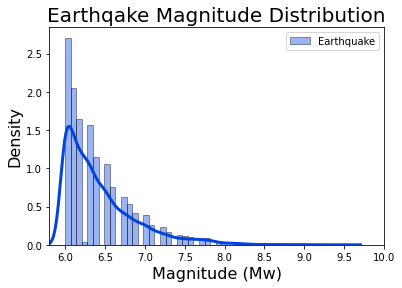

In [66]:
sns.distplot(eq4.mag, hist=True, color='xkcd:blue',hist_kws=dict(edgecolor="black"), kde_kws=dict(linewidth=3), label='Earthquake')
plt.xlim(5.8, 10)
plt.xlabel('Magnitude (Mw)', size=16)
plt.ylabel('Density', size=16)
plt.title('Earthqake Magnitude Distribution', size=20);
pyplot.legend(loc='upper right')
pyplot.show()
plt.show();

***Figure 21.*** Distplot below showing the distribution of earthquake magnitudes between 6.0 and 10 over the past 200 years. 

# **Discussion**

Over the past 200 years, the frequency of earthquakes (>6 M) highly outnumber the frequency of volcanoes per year. Both volcanoes and earthquakes plot along plate boundaries and most commonly along subduction zones. Overall, subduction zone tectonic settings acount for 78% of volcanic activity. Further examination of the Colima volcano in Mexico, indicates that earthquakes (>6 M) occur around but not always directly underneath volcanic eruption locations. 

Of the 11,701 earthquakes in the dataset 63.7% of them were between 6.0-6.4 magnitude with decreasing prevalence as magnitude increases. Of the 520 total, and 11 volcano types, stratovolcanoes dominate the distribution occurring 60.2% of the time, they occur in all tectonic settings, and have produced all of the potential rock types. Andesite is the most common rock type produced from volcanoes over the past 200 years. 

On average, there are 2.6 volcanic eruptions per year and 58.5 earthquakes (>6 M) per year. Volcanic eruptions can take place between -4,200’ and 6,739 meters elevation. With a median elevation of 1,409 m, and a mean of 1,579 m above sea level. Earthquakes take place within a range of ~0 km to 688 km depth beneath the earths surface. With a mean of 62.1 km, and a median depth of 27.1 km.  


# **Conclusions**

This project was a great way to see the distrobution of both volcanoes and earthquakes over the past 200 years. Geospatial relationships confirm both these events happen most often at plate boundaries, also that earthquakes (>6 M) occur around but not always directly underneath volcanic eruption locations. The increased denisty and reliability of data can also be seen as time goes on. Moving forward these will improve even more as we work to further understand the earth and its processes, not only for safety but also for science. 

# **References**

https://earthquake.usgs.gov/learn/glossary/?term=subduction%20zone

https://en.wikipedia.org/wiki/Volcanic_rock

https://en.wikipedia.org/wiki/Andesite

https://en.wikipedia.org/wiki/Earthquake

https://volcano.si.edu/list_volcano_holocene.cfm

https://earthquake.usgs.gov/earthquakes/search/